# PyCaret 2 Anomaly Detection

In [13]:
# check version
from pycaret.utils import version
version()

'2.2.2'

# 1. Loading Dataset

In [19]:
from pycaret.datasets import get_data
data = get_data('insurance')

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# 2. Initialize Setup

In [22]:
from pycaret.regression import *
reg1 = setup(data, target = 'charges', session_id=123, log_experiment=True, experiment_name='insurance1',fold_shuffle=True,imputation_type='iterative')

,Description,Value
0,session_id,123
1,Target,charges
2,Original Data,"(1338, 7)"
3,Missing Values,False
4,Numeric Features,2
5,Categorical Features,4
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(936, 14)"


AttributeError: 'Make_Time_Features' object has no attribute 'list_of_features'

# 3. Compare Baseline

In [23]:
best_model = compare_models(fold=5)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2747.0083,23615399.2080,4855.3039,0.8397,0.4573,0.3319,0.0340
lightgbm,Light Gradient Boosting Machine,3008.6958,25611931.4480,5059.1437,0.8260,0.5703,0.3818,0.0560
catboost,CatBoost Regressor,2893.7955,25821396.8390,5078.4272,0.8243,0.4963,0.3513,0.4680
rf,Random Forest Regressor,2818.2670,26082738.8961,5103.0617,0.8224,0.4861,0.3468,0.1460
et,Extra Trees Regressor,2794.8444,28540980.0801,5337.4252,0.8053,0.4870,0.3303,0.1380
ada,AdaBoost Regressor,4235.0953,29969679.9081,5463.9652,0.7963,0.6240,0.6979,0.0180
xgboost,Extreme Gradient Boosting,3237.1947,31436546.8000,5606.1036,0.7857,0.5777,0.4116,0.1720
llar,Lasso Least Angle Regression,4319.9923,38312189.2000,6178.4681,0.7410,0.6104,0.4419,0.0100
lr,Linear Regression,4329.0766,38367771.2000,6183.2463,0.7406,0.6120,0.4431,1.2560
lasso,Lasso Regression,4328.8945,38362647.6000,6182.8431,0.7406,0.6105,0.4431,0.7640



# 4. Create Model

In [24]:
lightgbm = create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,3002.9144,24845683.0908,4984.5444,0.8484,0.5437,0.4092
1,2786.6790,25275048.7114,5027.4296,0.8034,0.8324,0.4533
2,2846.3133,27515109.8637,5245.4847,0.8312,0.5122,0.2918
3,2895.6532,25333869.1592,5033.2762,0.8578,0.4528,0.3136
4,3168.0029,27845459.1261,5276.8797,0.7838,0.5566,0.4155
5,2975.5427,21966085.9859,4686.7991,0.8206,0.5924,0.4336
6,2999.9007,23772011.3294,4875.6550,0.8362,0.4278,0.3364
7,3191.3479,32013667.8331,5658.0622,0.7882,0.4182,0.2786
8,2702.7511,19227251.4860,4384.8890,0.8789,0.4181,0.3310
9,3030.3052,27379429.3212,5232.5356,0.7941,0.5510,0.3643


In [25]:
import numpy as np
lgbms = [create_model('lightgbm', learning_rate=i) for i in np.arange(0.1,1,0.1)]

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,4490.6600,41842918.5100,6468.6102,0.7447,0.7833,0.7389
1,3975.5891,39402623.8607,6277.1509,0.6936,0.7533,0.7638
2,4112.6718,39384664.0135,6275.7202,0.7584,0.7369,0.4616
3,4124.7673,36753426.1532,6062.4604,0.7937,0.8475,0.5156
4,4865.1129,47255804.5407,6874.2857,0.6331,0.9187,0.6593
5,4094.5932,31830300.9970,5641.8349,0.7401,0.6686,0.6830
6,4084.4094,34896418.7794,5907.3191,0.7596,0.6863,0.4799
7,4233.2326,42797438.6263,6541.9751,0.7169,0.6013,0.4284
8,3623.4783,27551487.7469,5248.9511,0.8265,0.6500,0.5028
9,4293.6676,37558284.6547,6128.4814,0.7175,0.7061,0.6048


In [26]:
print(len(lgbms))

9


# 5. Tune Hyperparameters

In [27]:
tuned_lightgbm = tune_model(lightgbm, n_iter=50, optimize = 'MAE')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2576.1714,19152351.2134,4376.3399,0.8832,0.4500,0.3508
1,2611.5715,23050047.7998,4801.0465,0.8207,0.5152,0.3349
2,2622.3486,25593220.6573,5058.9743,0.8430,0.4375,0.2449
3,3018.2300,26105592.9864,5109.3633,0.8534,0.4629,0.3276
4,2890.0000,23989258.0725,4897.8830,0.8137,0.5249,0.3844
5,2517.6904,17829471.3344,4222.4959,0.8544,0.4830,0.3449
6,2795.3148,21644592.1364,4652.3749,0.8509,0.4094,0.3223
7,3240.2971,30883254.2413,5557.2704,0.7957,0.4599,0.3077
8,2685.1987,19626662.0508,4430.1989,0.8764,0.3988,0.3164
9,2879.8401,25801651.3411,5079.5326,0.8059,0.4905,0.2999


In [28]:

tuned_lightgbm

LGBMRegressor(bagging_fraction=0.9, bagging_freq=7, boosting_type='gbdt',
              class_weight=None, colsample_bytree=1.0, feature_fraction=0.9,
              importance_type='split', learning_rate=0.134, max_depth=-1,
              min_child_samples=45, min_child_weight=0.001, min_split_gain=0.4,
              n_estimators=70, n_jobs=-1, num_leaves=90, objective=None,
              random_state=123, reg_alpha=0.1, reg_lambda=0.001, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

# 6. Ensemble Model

In [29]:
dt = create_model('dt')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,3421.1252,48300688.8782,6949.8697,0.7053,0.5486,0.4113
1,3129.7234,43499307.5525,6595.4005,0.6617,0.6204,0.4346
2,3488.2087,47879550.8192,6919.5051,0.7063,0.5905,0.3143
3,3205.2427,39726132.5665,6302.8670,0.7770,0.5676,0.4385
4,2868.4599,39014433.7771,6246.1535,0.6971,0.5423,0.2806
5,2727.9474,37100423.6270,6091.0117,0.6970,0.4959,0.2755
6,2828.4661,35069801.1224,5921.9761,0.7584,0.4017,0.2162
7,3656.1569,51802881.6729,7197.4219,0.6573,0.4937,0.3051
8,2779.2367,34348426.5781,5860.7531,0.7837,0.3993,0.3199
9,2902.8962,40356715.4182,6352.6936,0.6965,0.5404,0.4014


In [30]:
bagged_dt = ensemble_model(dt, n_estimators=50)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2603.8455,20283668.4927,4503.7394,0.8763,0.4104,0.3197
1,2598.8316,25365845.1570,5036.4516,0.8027,0.5409,0.3686
2,2777.2953,28829030.9784,5369.2673,0.8232,0.4733,0.2611
3,2746.7194,24651479.1461,4965.0256,0.8616,0.4686,0.3144
4,3033.4587,30176451.5776,5493.3097,0.7657,0.5573,0.3848
5,2988.2663,25326430.6845,5032.5372,0.7932,0.5505,0.4129
6,2814.9039,25388556.2827,5038.7058,0.8251,0.4118,0.2991
7,3139.3272,33038543.2527,5747.9164,0.7814,0.4279,0.2914
8,2395.4524,17349612.9494,4165.2867,0.8907,0.3740,0.2770
9,2788.4363,26425748.1107,5140.5980,0.8012,0.4904,0.3452


In [31]:
boosted_dt = ensemble_model(dt, method = 'Boosting')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2640.2568,36012728.2084,6001.0606,0.7803,0.4355,0.2450
1,2411.7644,30710491.6219,5541.7048,0.7612,0.5757,0.3526
2,2225.6571,28955843.9629,5381.0635,0.8224,0.4726,0.1461
3,2653.2741,34294122.1757,5856.1184,0.8075,0.4785,0.2196
4,2619.8472,33646036.6232,5800.5204,0.7388,0.5234,0.2747
5,2704.8440,31446370.0664,5607.7063,0.7432,0.5403,0.2960
6,2783.2234,34734127.3919,5893.5666,0.7607,0.4844,0.3386
7,2747.1043,37093175.8172,6090.4167,0.7546,0.4021,0.1750
8,1832.2897,21063622.2938,4589.5122,0.8674,0.3286,0.1288
9,2495.9614,32145671.5318,5669.7153,0.7582,0.5165,0.2880


# 7. Blend Models

In [36]:
blender = blend_models(estimator_list=[])

IntProgress(value=0, description='Processing: ', max=6)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,22:56:24
Status,. . . . . . . . . . . . . . . . . .,Creating Logs
Estimator,. . . . . . . . . . . . . . . . . .,Extra Trees Regressor


,MAE,MSE,RMSE,R2,RMSLE,MAPE


RuntimeError: Cannot clone object TunableVotingRegressor(estimators=[], n_jobs=-1, verbose=False, weights=[]), as the constructor either does not set or modifies parameter weights

# 8. Stack Models


In [41]:
stacker = stack_models(estimator_list = compare_models(n_select=5, fold = 5).index.tolist())

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2747.0083,23615399.2080,4855.3039,0.8397,0.4573,0.3319,0.0360
lightgbm,Light Gradient Boosting Machine,3008.6958,25611931.4480,5059.1437,0.8260,0.5703,0.3818,0.0220
catboost,CatBoost Regressor,2893.7955,25821396.8390,5078.4272,0.8243,0.4963,0.3513,0.3960
rf,Random Forest Regressor,2818.2670,26082738.8961,5103.0617,0.8224,0.4861,0.3468,0.1280
et,Extra Trees Regressor,2794.8444,28540980.0801,5337.4252,0.8053,0.4870,0.3303,0.1160
ada,AdaBoost Regressor,4235.0953,29969679.9081,5463.9652,0.7963,0.6240,0.6979,0.0140
xgboost,Extreme Gradient Boosting,3237.1947,31436546.8000,5606.1036,0.7857,0.5777,0.4116,0.1040
llar,Lasso Least Angle Regression,4319.9923,38312189.2000,6178.4681,0.7410,0.6104,0.4419,0.0080
lr,Linear Regression,4329.0766,38367771.2000,6183.2463,0.7406,0.6120,0.4431,0.0100
lasso,Lasso Regression,4328.8945,38362647.6000,6182.8431,0.7406,0.6105,0.4431,0.0080


AttributeError: 'builtin_function_or_method' object has no attribute 'tolist'

# 9. Analyze Model

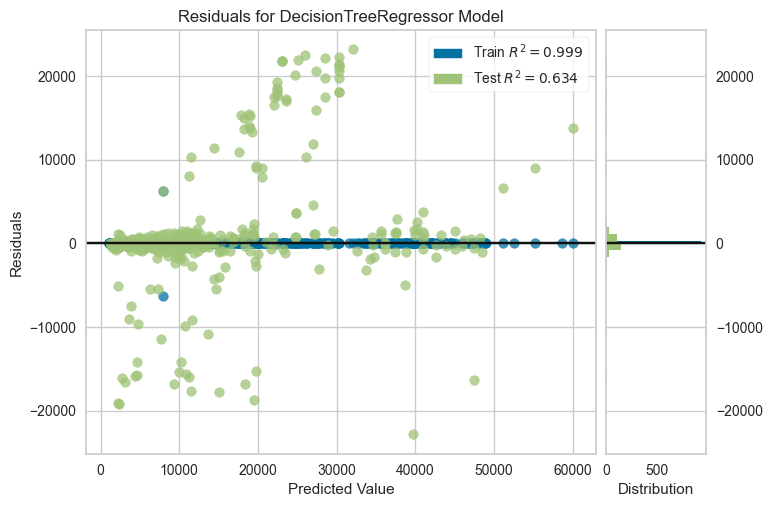

In [42]:
plot_model(dt)

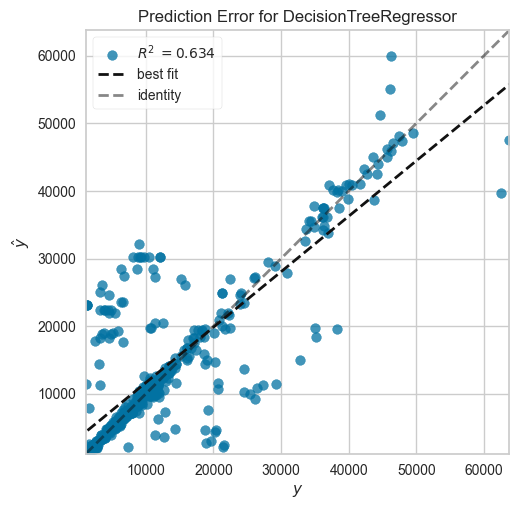

In [43]:
plot_model(dt, plot = 'error')

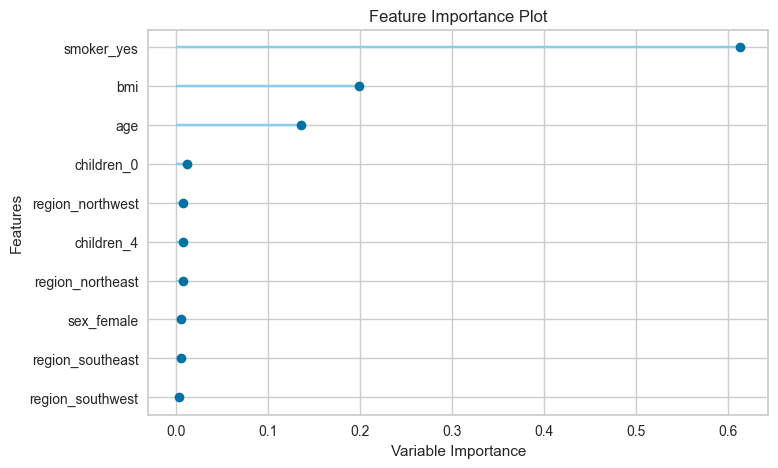

In [44]:
plot_model(dt, plot = 'feature')

In [45]:
evaluate_model(dt)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

# 10. Interpret Model

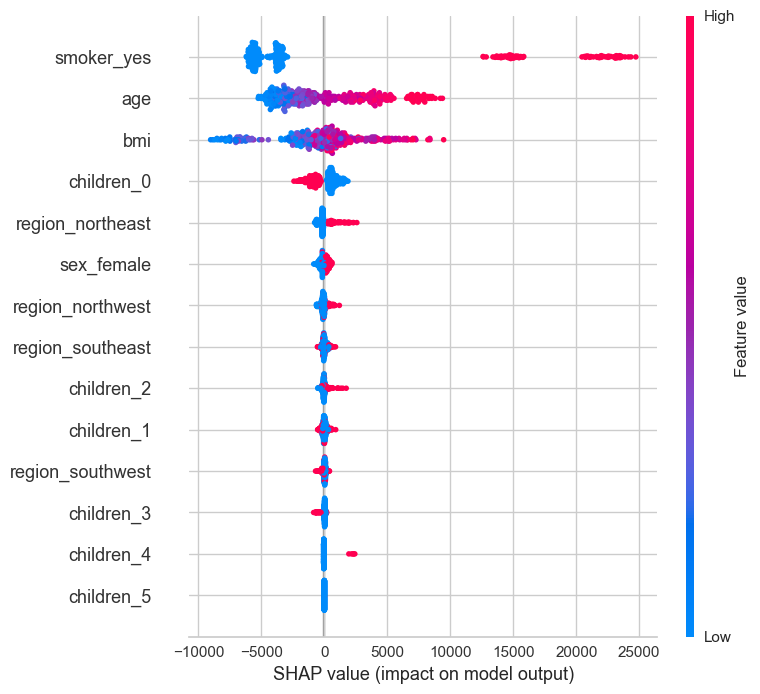

In [46]:
interpret_model(lightgbm)

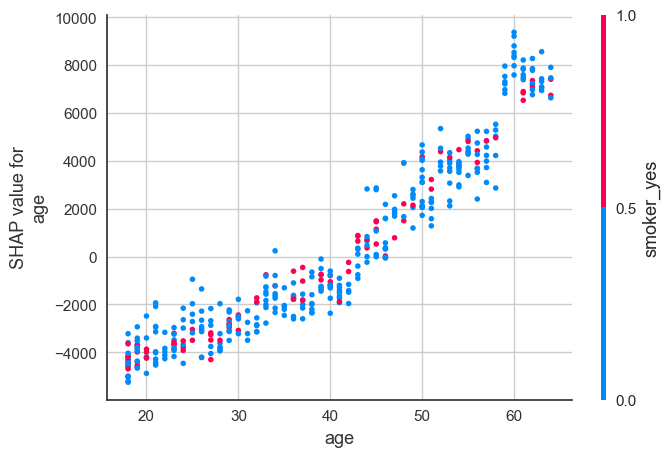

In [47]:
interpret_model(lightgbm, plot = 'correlation')

In [48]:
interpret_model(lightgbm, plot = 'reason', observation = 12)

# 11. AutoML()

In [49]:
best = automl(optimize = 'MAE')
best

# 12. Predict Model

In [50]:
pred_holdouts = predict_model(lightgbm)
pred_holdouts.head()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,2764.0353,20686826.5633,4548.2773,0.8552,0.5223,0.3678


,age,bmi,sex_female,children_0,children_1,children_2,children_3,children_4,children_5,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,charges,Label
0,49.0,42.680000,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9800.888672,9363.966518
1,32.0,37.334999,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,4667.607422,10393.493570
2,27.0,31.400000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,34838.871094,35628.993319
3,35.0,24.129999,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5125.215820,6926.826747
4,60.0,25.740000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,12142.578125,17508.278269


In [51]:
new_data = data.copy()
new_data.drop(['charges'], axis=1, inplace=True)
predict_new = predict_model(best, data=new_data)
predict_new.head()

,age,sex,bmi,children,smoker,region,Label
0,19,female,27.900,0,yes,southwest,17479.821127
1,18,male,33.770,1,no,southeast,4117.274318
2,28,male,33.000,3,no,southeast,5398.949248
3,33,male,22.705,0,no,northwest,11697.166563
4,32,male,28.880,0,no,northwest,4011.614657


# 13. Save / Load Model

In [54]:
save_model(best, model_name='best-model')

AttributeError: 'Make_Time_Features' object has no attribute 'list_of_features'

In [56]:
loaded_bestmodel = load_model('best-model')
print(loaded_bestmodel)

Transformation Pipeline and Model Successfully Loaded


FileNotFoundError: [Errno 2] No such file or directory: 'best-model.pkl'

In [57]:
from sklearn import set_config
set_config(display='diagram')
loaded_bestmodel[0]

NameError: name 'loaded_bestmodel' is not defined

In [58]:
from sklearn import set_config
set_config(display='text')

# 14. Deploy Model

In [59]:

deploy_model(best, model_name = 'best-aws', authentication = {'bucket' : 'pycaret-test'})

AttributeError: 'Make_Time_Features' object has no attribute 'list_of_features'

# 15. Get Config / Set Config

In [60]:
X_train = get_config('X_train')
X_train.head()

,age,bmi,sex_female,children_0,children_1,children_2,children_3,children_4,children_5,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
300,36.0,27.549999,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
904,60.0,35.099998,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
670,30.0,31.570000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
617,49.0,25.600000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
373,26.0,32.900002,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [61]:
get_config('seed')

123

In [62]:

from pycaret.regression import set_config
set_config('seed', 999)

In [63]:
get_config('seed')

999

# 16. MLFlow UI

In [64]:
!mlflow ui

^C


### End